In [1]:
import blackhc.notebook

Appended /home/blackhc/PycharmProjects/active_learning2/src to paths
Switched to directory /home/blackhc/PycharmProjects/active_learning2
%load_ext autoreload
%autoreload 2


In [2]:
import recover_model
from blackhc import laaos
from tqdm import tqdm_notebook
import numpy as np
import torch
import itertools

import mc_dropout
    
from al_notebook.torch_utils import gc_cuda, print_cuda_info, print_global_torch_tensors
    
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [32]:
import al_notebook.plots as alp

In [3]:
%store -r comparison_over_n_results_fixed_ws
batch_bald_samples_fixed_ws, acquisition_bags_fixed_ws, batch_cond_entropy_fixed_ws = comparison_over_n_results_fixed_ws

In [10]:
key=(9, 'simple', 10000)
samples = batch_bald_samples_fixed_ws[key]

In [50]:
def legend_all_axes(figure=None, axes=None):
    if figure is None:
        figure = plt.gcf()
    if axes is None:
        axes = plt.gca()   
    axes.legend(*(itertools.chain(*chain) for chain in zip(*(ax.get_legend_handles_labels() for ax in figure.axes))), loc='best')
    
def plot_sorted_density(scores, axes=None, step=1, trace=0):
    if axes is None:
        axes = plt.gca()
        
    scores = scores[::step][1:]
        
    sorted_scores_median, sorted_indices = scores.median(dim=0)[0].sort(descending=True)
    sorted_scores_means = scores.mean(dim=0)[sorted_indices]
        
    sorted_scores = scores[:, sorted_indices]
      
    num_points = len(sorted_scores_median)
    r = np.broadcast_to(np.asarray(list(range(num_points)))[:, None], shape=sorted_scores.t().shape)
    s = np.asarray(list(range(num_points)))
    axes.scatter(r, sorted_scores.t().cpu().numpy(), marker='.', alpha=0.25, color='black')
    #axes.scatter(s, sorted_scores_median.cpu().numpy(), marker='.', color='C0', label='median')
    #axes.scatter(s, sorted_scores_means.cpu().numpy(), marker='.', color='C1', label='mean')
    axes.scatter(s, sorted_scores[trace].cpu().numpy(), marker='o', color='C0', label='trace')
    
    return sorted_indices


def plot_sorted_stddev(scores, sorted_indices, axes=None, log_stddev=False):
    if axes is None:
        axes = plt.gca()
        
    sorted_scores_stddev = scores.std(dim=0)[sorted_indices]
    s = np.asarray(list(range(len(sorted_indices))))
    
    if log_stddev:
        axes.set_yscale('log')
        axes.grid(True,'both')
    return axes.scatter(s, sorted_scores_stddev.cpu().numpy(), marker='.', c='C2', label='stddev')

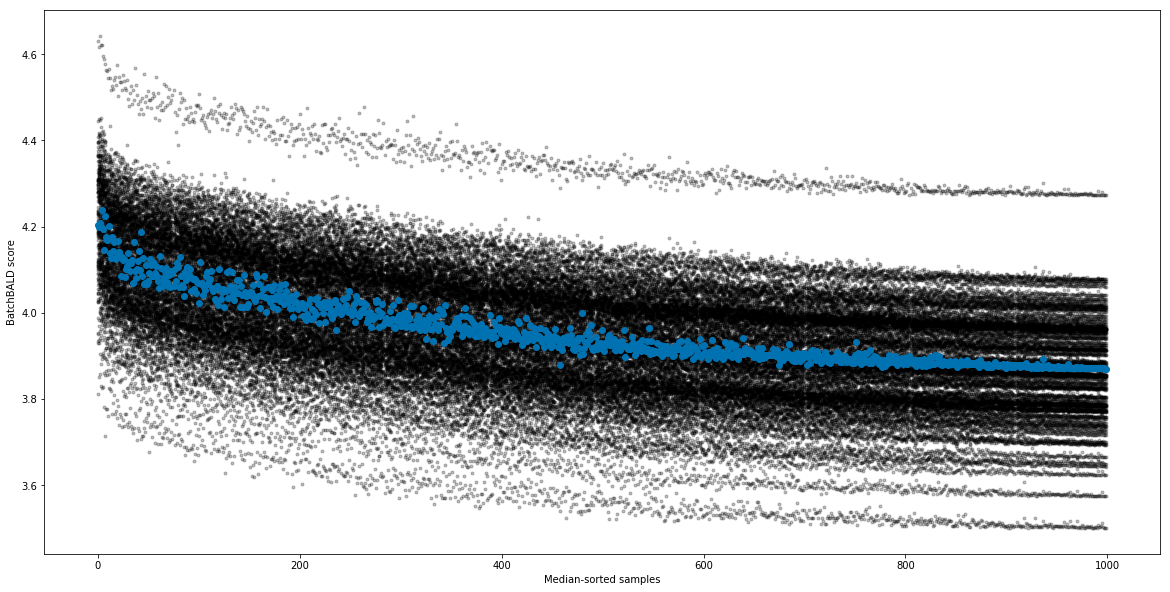

In [55]:
plt.figure(figsize=(20,10))
plot_sorted_density(samples, trace=55);
plt.ylabel('BatchBALD score')
plt.xlabel('Median-sorted samples')
alp.plot_save(blackhc.notebook.original_dir + '/N9_simple_10000_sampled_bb.jpg', dpi=150)